In [10]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [12]:
data = pd.read_csv('./input/laptops.csv', encoding='latin-1')
data.head(10)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [13]:
print(f'Data Shape\nRows: {data.shape[0]}\nColumns: {data.shape[1]}')
print('=' * 30)
data.info()

Data Shape
Rows: 1303
Columns: 13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [14]:
data.describe()

,Unnamed: 0,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [16]:
data['Product'] = data['Product'].str.split('(').apply(lambda x: x[0])

In [17]:
data['CPu_Speed'] = data['Cpu'].str.split(' ').apply(lambda x: x[-1]).str.replace('GHz', '')
data['Cpu_Vender'] = data['Cpu'].str.split(' ').apply(lambda x: x[0])
data['Cpu_Type'] = data['Cpu'].str.split(' ').apply(lambda x: x[1:4] if x[1]=='Celeron' and 'Pentium' and 'Xeon' else (x[1:3] if (x[1]=='Core' or x[0]=='AMD') else x[0]))
data['Cpu_Type'] = data['Cpu_Type'].apply(lambda x: ' '.join(x))
data['Cpu_Type']
data.head(10)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,CPu_Speed,Cpu_Vender,Cpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,Intel,Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,Intel,Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,Intel,Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,Intel,Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,Intel,Core i5
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00,3,AMD,A9-Series 9420
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,2.2,Intel,Core i7
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70,1.8,Intel,Core i5
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,1.8,Intel,Core i7
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,1.6,Intel,Core i5


In [18]:
split_mem = data['Memory'].str.split(' ', 1, expand=True)
data['Storage_Type'] = split_mem[1]
data['Memory'] = split_mem[0]
data['Memory'].unique()
data.head(10)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,CPu_Speed,Cpu_Vender,Cpu_Type,Storage_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,Intel,Core i5,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,Intel,Core i5,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,Intel,Core i5,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,Intel,Core i7,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,Intel,Core i5,SSD
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB,AMD Radeon R5,Windows 10,2.1kg,400.00,3,AMD,A9-Series 9420,HDD
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,2.2,Intel,Core i7,Flash Storage
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB,Intel HD Graphics 6000,macOS,1.34kg,1158.70,1.8,Intel,Core i5,Flash Storage
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,1.8,Intel,Core i7,SSD
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,1.6,Intel,Core i5,SSD


In [19]:
data['Ram'] = data['Ram'].str.replace('GB', '')

df_mem = data['Memory'].str.split('(\d+)', expand=True)
data['Memory'] = pd.to_numeric(df_mem[1])
data.rename(columns={'Memory': 'Memory (GB or TB)'}, inplace=True)

In [20]:
def mem(x):
    if x == 1:
        return 1024
    elif x == 2:
        return 2048

In [21]:
data['Memory (GB or TB)'] = data['Memory (GB or TB)'].apply(lambda x: 1024 if x==1 else x)
data['Memory (GB or TB)'] = data['Memory (GB or TB)'].apply(lambda x: 2048 if x==2 else x)
data.rename(columns={'Memory (GB or TB)': 'Storage (GB)'}, inplace=True)
data.head(10)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,OpSys,Weight,Price_euros,CPu_Speed,Cpu_Vender,Cpu_Type,Storage_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,Intel,Core i5,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,Intel,Core i5,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,Intel,Core i5,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,Intel,Core i7,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,Intel,Core i5,SSD
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500,AMD Radeon R5,Windows 10,2.1kg,400.00,3,AMD,A9-Series 9420,HDD
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,2.2,Intel,Core i7,Flash Storage
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256,Intel HD Graphics 6000,macOS,1.34kg,1158.70,1.8,Intel,Core i5,Flash Storage
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,1.8,Intel,Core i7,SSD
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,1.6,Intel,Core i5,SSD


In [22]:
data['Weight'] = data['Weight'].str.replace('kg', '')
data.head(10)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,OpSys,Weight,Price_euros,CPu_Speed,Cpu_Vender,Cpu_Type,Storage_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel,Core i5,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel,Core i5,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel,Core i5,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel,Core i7,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel,Core i5,SSD
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500,AMD Radeon R5,Windows 10,2.1,400.00,3,AMD,A9-Series 9420,HDD
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,2.2,Intel,Core i7,Flash Storage
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256,Intel HD Graphics 6000,macOS,1.34,1158.70,1.8,Intel,Core i5,Flash Storage
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512,Nvidia GeForce MX150,Windows 10,1.3,1495.00,1.8,Intel,Core i7,SSD
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256,Intel UHD Graphics 620,Windows 10,1.6,770.00,1.6,Intel,Core i5,SSD


In [23]:
gpu_distr_list = data['Gpu'].str.split(' ')
data['Gpu_Vender'] = data['Gpu'].str.split(' ').apply(lambda x: x[0])
data['Gpu_Type'] = data['Gpu'].str.split(' ').apply(lambda x: x[1:])
data['Gpu_Type'] = data['Gpu_Type'].apply(lambda x: ' '.join(x))
data.head(10)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,OpSys,Weight,Price_euros,CPu_Speed,Cpu_Vender,Cpu_Type,Storage_Type,Gpu_Vender,Gpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel,Core i5,SSD,Intel,Iris Plus Graphics 640
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel,Core i5,Flash Storage,Intel,HD Graphics 6000
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel,Core i5,SSD,Intel,HD Graphics 620
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel,Core i7,SSD,AMD,Radeon Pro 455
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel,Core i5,SSD,Intel,Iris Plus Graphics 650
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500,AMD Radeon R5,Windows 10,2.1,400.00,3,AMD,A9-Series 9420,HDD,AMD,Radeon R5
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256,Intel Iris Pro Graphics,Mac OS X,2.04,2139.97,2.2,Intel,Core i7,Flash Storage,Intel,Iris Pro Graphics
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256,Intel HD Graphics 6000,macOS,1.34,1158.70,1.8,Intel,Core i5,Flash Storage,Intel,HD Graphics 6000
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512,Nvidia GeForce MX150,Windows 10,1.3,1495.00,1.8,Intel,Core i7,SSD,Nvidia,GeForce MX150
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256,Intel UHD Graphics 620,Windows 10,1.6,770.00,1.6,Intel,Core i5,SSD,Intel,UHD Graphics 620


In [24]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
data['Ips'] = data['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [25]:
def cat_os(op_s):
    if op_s =='Windows 10' or op_s == 'Windows 7' or op_s == 'Windows 10 S':
        return 'Windows'
    elif op_s =='macOS' or op_s == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other/No OS/Linux'
    
data['OpSys'] = data['OpSys'].apply(cat_os)

In [26]:
data = data.reindex(columns=["Company", "TypeName", "Inches", "Touchscreen", 
                             "Ips", "Cpu_Vender", "Cpu_Type","Ram", "Storage (GB)", 
                             "Storage Type", "Gpu_Vender", "Gpu_Type", "Weight", "OpSys", "Price_euros" ])

In [27]:
data.head(10)

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Cpu_Type,Ram,Storage (GB),Storage Type,Gpu_Vender,Gpu_Type,Weight,OpSys,Price_euros
0,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,128,NaN,Intel,Iris Plus Graphics 640,1.37,Mac,1339.69
1,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,128,NaN,Intel,HD Graphics 6000,1.34,Mac,898.94
2,HP,Notebook,15.6,0,0,Intel,Core i5,8,256,NaN,Intel,HD Graphics 620,1.86,Other/No OS/Linux,575.00
3,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,512,NaN,AMD,Radeon Pro 455,1.83,Mac,2537.45
4,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,256,NaN,Intel,Iris Plus Graphics 650,1.37,Mac,1803.60
5,Acer,Notebook,15.6,0,0,AMD,A9-Series 9420,4,500,NaN,AMD,Radeon R5,2.1,Windows,400.00
6,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,256,NaN,Intel,Iris Pro Graphics,2.04,Mac,2139.97
7,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,256,NaN,Intel,HD Graphics 6000,1.34,Mac,1158.70
8,Asus,Ultrabook,14.0,0,0,Intel,Core i7,16,512,NaN,Nvidia,GeForce MX150,1.3,Windows,1495.00
9,Acer,Ultrabook,14.0,0,1,Intel,Core i5,8,256,NaN,Intel,UHD Graphics 620,1.6,Windows,770.00


In [29]:
data['Ram'] = data['Ram'].astype('int')
data['Storage (GB)'] = data['Storage (GB)'].astype('int')
data['Weight'] = data['Weight'].astype('float')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Touchscreen   1303 non-null   int64  
 4   Ips           1303 non-null   int64  
 5   Cpu_Vender    1303 non-null   object 
 6   Cpu_Type      1303 non-null   object 
 7   Ram           1303 non-null   int32  
 8   Storage (GB)  1303 non-null   int32  
 9   Storage Type  0 non-null      float64
 10  Gpu_Vender    1303 non-null   object 
 11  Gpu_Type      1303 non-null   object 
 12  Weight        1303 non-null   float64
 13  OpSys         1303 non-null   object 
 14  Price_euros   1303 non-null   float64
dtypes: float64(4), int32(2), int64(2), object(7)
memory usage: 142.6+ KB


In [31]:
sns.set(rc={'figure.figsize': (9,5)})

<AxesSubplot:>

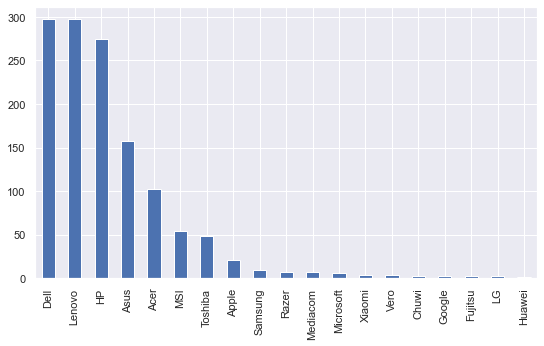

In [32]:
data['Company'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

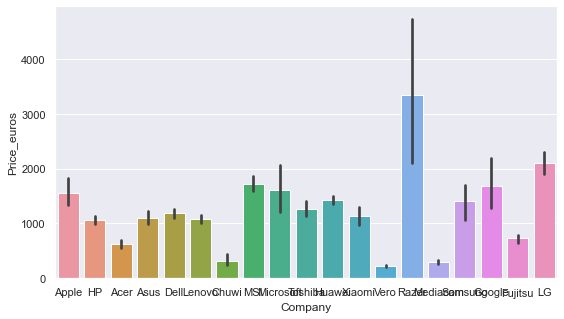

In [33]:
sns.barplot(x=data['Company'], y=data['Price_euros'])

<AxesSubplot:>

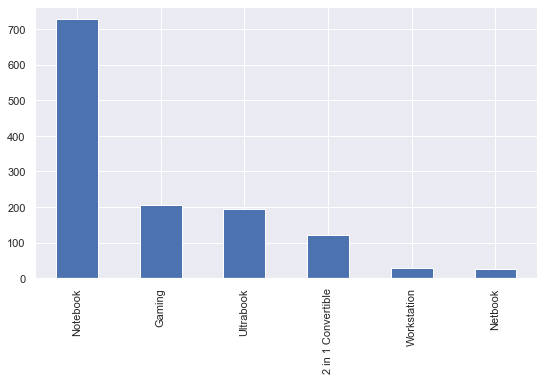

In [36]:
data['TypeName'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

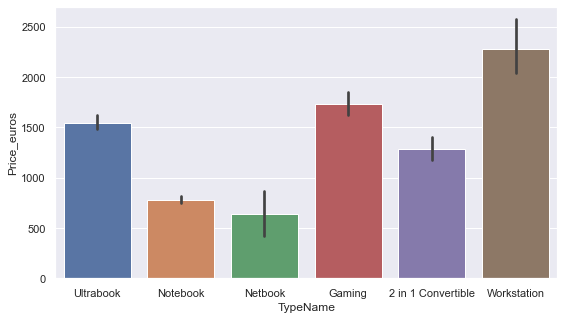

In [37]:
sns.barplot(x=data['TypeName'], y=data['Price_euros'])

In [38]:
cpu_distr = data['Cpu_Type'].value_counts()[:10].reset_index()
cpu_distr

,index,Cpu_Type
0,Core i7,527
1,Core i5,423
2,Core i3,136
3,Celeron Dual Core,80
4,I n t e l,47
5,Core M,19
6,A9-Series 9420,12
7,Celeron Quad Core,8
8,A6-Series 9220,8
9,A12-Series 9720P,7


<AxesSubplot:xlabel='index', ylabel='Cpu_Type'>

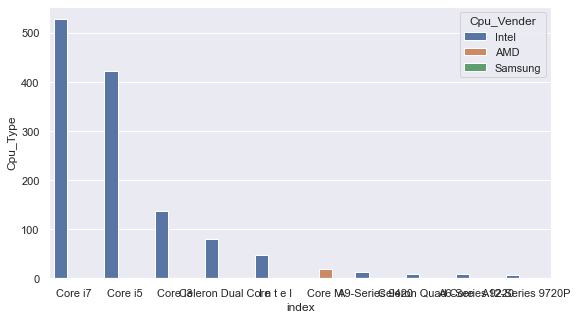

In [39]:
sns.barplot(x=cpu_distr['index'], y=cpu_distr['Cpu_Type'], hue='Cpu_Vender', data=data)

In [40]:
gpu_distr = data['Gpu_Type'].value_counts()[:10].reset_index()
gpu_distr

,index,Gpu_Type
0,HD Graphics 620,281
1,HD Graphics 520,185
2,UHD Graphics 620,68
3,GeForce GTX 1050,66
4,GeForce GTX 1060,48
5,GeForce 940MX,43
6,Radeon 530,41
7,HD Graphics 500,39
8,HD Graphics 400,37
9,GeForce GTX 1070,30


<AxesSubplot:xlabel='index', ylabel='Gpu_Type'>

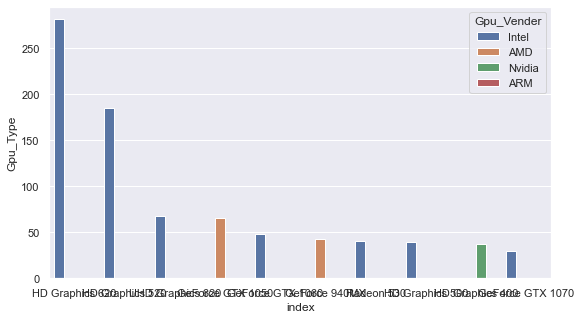

In [41]:
sns.barplot(x=gpu_distr['index'], y=gpu_distr['Gpu_Type'], hue='Gpu_Vender', data=data)

<AxesSubplot:xlabel='OpSys', ylabel='Price_euros'>

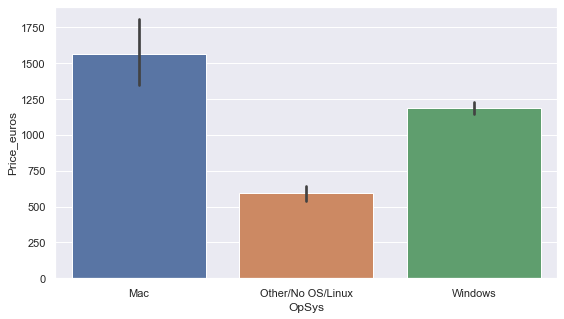

In [42]:
sns.barplot(x=data['OpSys'], y=data['Price_euros'])

In [43]:
corr_data = data.corr()
corr_data['Price_euros'].sort_values(ascending=False)

Price_euros     1.000000
Ram             0.743007
Ips             0.252208
Weight          0.210370
Touchscreen     0.191226
Inches          0.068197
Storage (GB)   -0.125363
Storage Type         NaN
Name: Price_euros, dtype: float64

<AxesSubplot:>

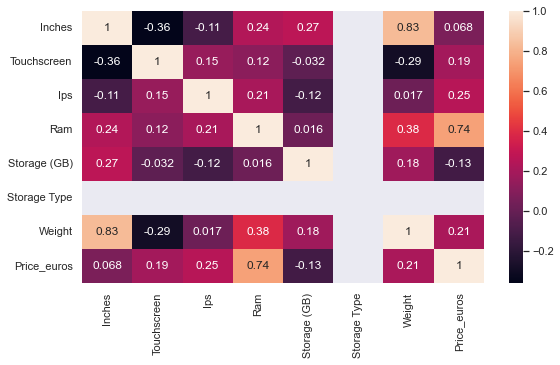

In [45]:
sns.heatmap(data.corr(), annot=True)

In [ ]:
X = 